<a href="https://colab.research.google.com/github/NsiriRoua/tensor_flow/blob/main/Wide_and_Deep_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

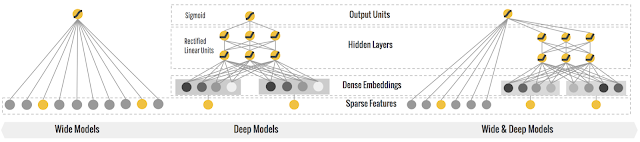

In [1]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,concatenate,Input
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model


# **Build the model**

**Functional API**

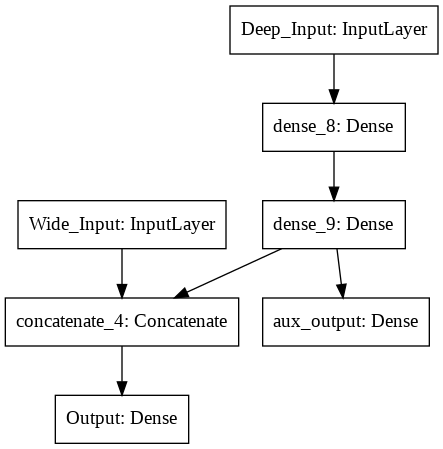

In [7]:
#Define Inputs
input_b=Input(shape=[1],name='Wide_Input')
input_a=Input(shape=[1],name='Deep_Input')

#Deep path
hidden_1=Dense(30,activation='relu')(input_a)

hidden_2=Dense(30,activation='relu')(hidden_1)

#Merged path
concat=concatenate([input_b,hidden_2])
output=Dense(1,name='Output')(concat)

#Onther for output for the deep path
aux_output=Dense(1,name='aux_output')(hidden_2)

#Build the model
model=Model(inputs=[input_a,input_b],outputs=[output,aux_output])

plot_model(model)


**Class**

In [12]:
class WideAndDeepModel(Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super().__init__(**kwargs)
    self.hidden1=Dense(units,activation=activation)
    self.hidden2=Dense(units,activation=activation)
    self.main_output=Dense(1)
    self.aux_output=Dense(1)
  
  def call(self,inputs):
    input_a,input_b=inputs
    hidden1=self.hidden1(input_a)
    hidden2=self.hidden2(hidden_1)
    concat=concatenate([input_b,hidden_2])
    main_output=self.main_output(concat)
    aux_output=self.aux_output(hidden_2)

    return main_output,aux_output

create an instance of the model

In [13]:
model=WideAndDeepModel()